In [136]:
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sympy.functions.combinatorial.numbers import stirling
from scipy.stats import norm
%matplotlib inline

In [137]:
matplotlib.rc('font', family='DejaVu Sans')

In [138]:
def permutations_with_cycles(n, k):
    '''Число перестановок n элементов с ровно k циклами.'''
    return stirling(n, k, kind=1, signed=False)

In [139]:
def get_cycles_number_destribution(n):
    '''Распределение числа циклов в случайной перестановке.'''
    return [permutations_with_cycles(n, k) / math.factorial(n) for k in range(1, n + 1)]

In [140]:
def get_destribution_function(destribution):
    '''Возвращает функцию распределения заданного распределения.'''
    result = [0]
    for i in range(len(destribution)):
        result.append(result[-1] + destribution[i])
    return result

In [141]:
def normalize_values(values, E, D):
    '''Нормализует величину.
    
    Все значения сдвигает на величину математического ожидания и делит на квадратный корень из дисперсии.'''
    return [(value - E) / D**0.5 for value in values]

In [142]:
def unnormalize_values(normalized_values, E, D):
    '''Обращает нормализацию.'''
    return [value * D**0.5 + E for value in normalized_values]

In [143]:
def get_destribution(destribution_function):
    '''Возвращает распределение, соответствующее данной функции распределения.'''
    return [destribution_function[i] - destribution_function[i - 1] for i in range(1, len(destribution_function))]

## Constants

In [144]:
n = 55
numbers_from_1_to_n = list(range(1, n + 1))
figure_size = (16, 8)

## Task 1

<Container object of 3 artists>

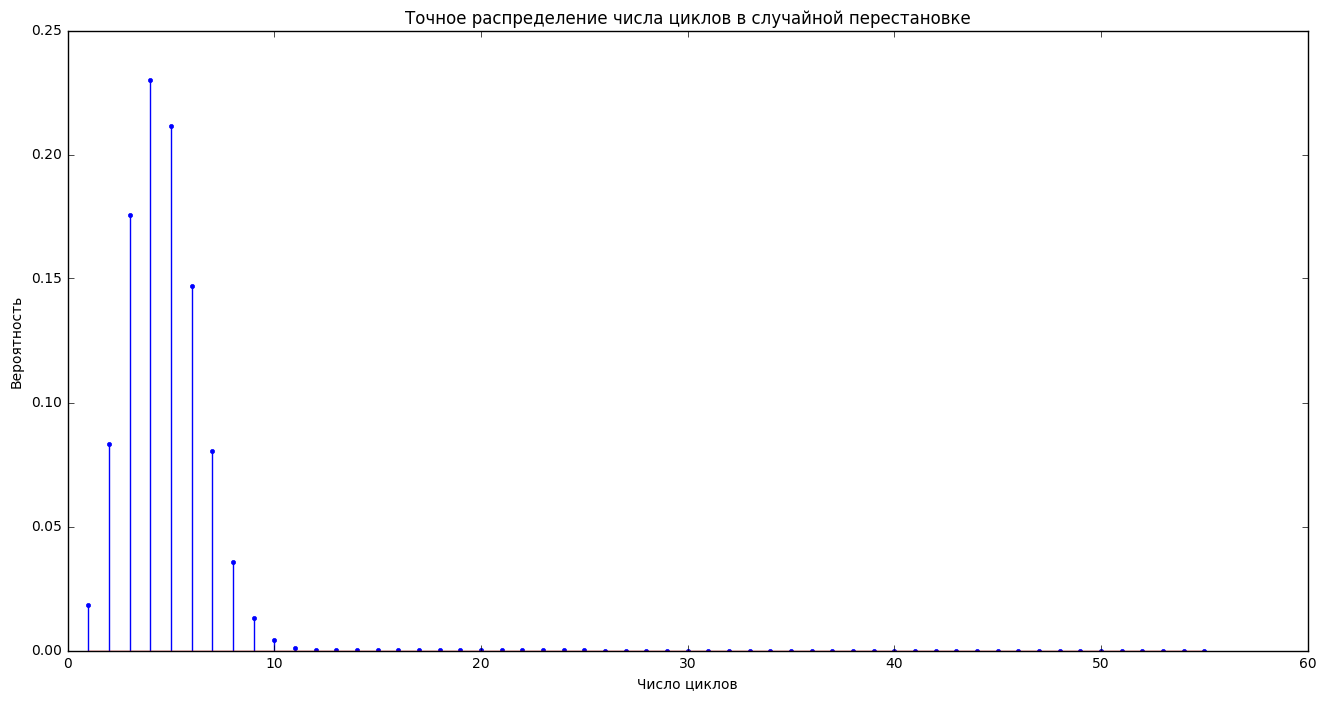

In [145]:
cycles_number_destribution = get_cycles_number_destribution(n)
x = numbers_from_1_to_n
y = cycles_number_destribution

plt.figure(figsize=figure_size)
plt.title('Точное распределение числа циклов в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Вероятность')
plt.stem(x, y, linefmt='b-', markerfmt='b.')

## Task 2

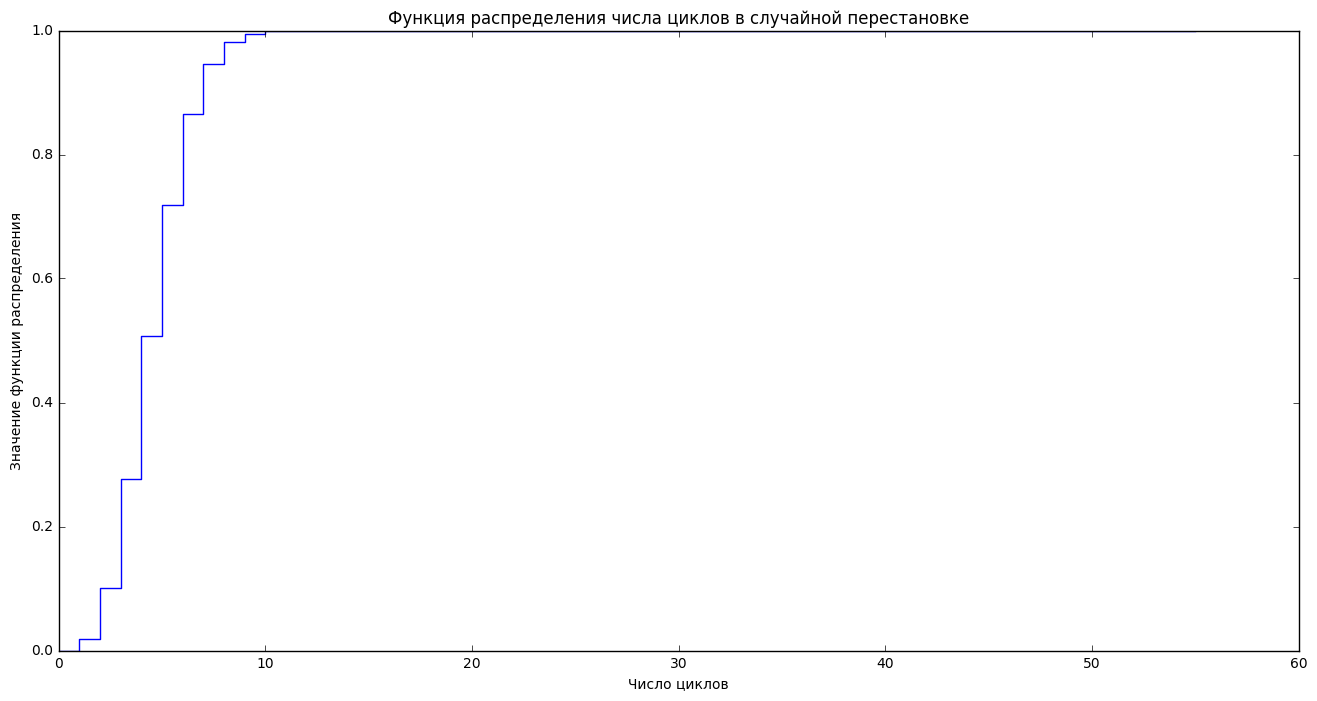

In [146]:
destribution_function = get_destribution_function(cycles_number_destribution)

x = [0] + numbers_from_1_to_n
y = destribution_function

plt.figure(figsize=figure_size)
plt.title('Функция распределения числа циклов в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Значение функции распределения')
plt.plot(x, y, 'b-', drawstyle='steps-post')

## Task 3

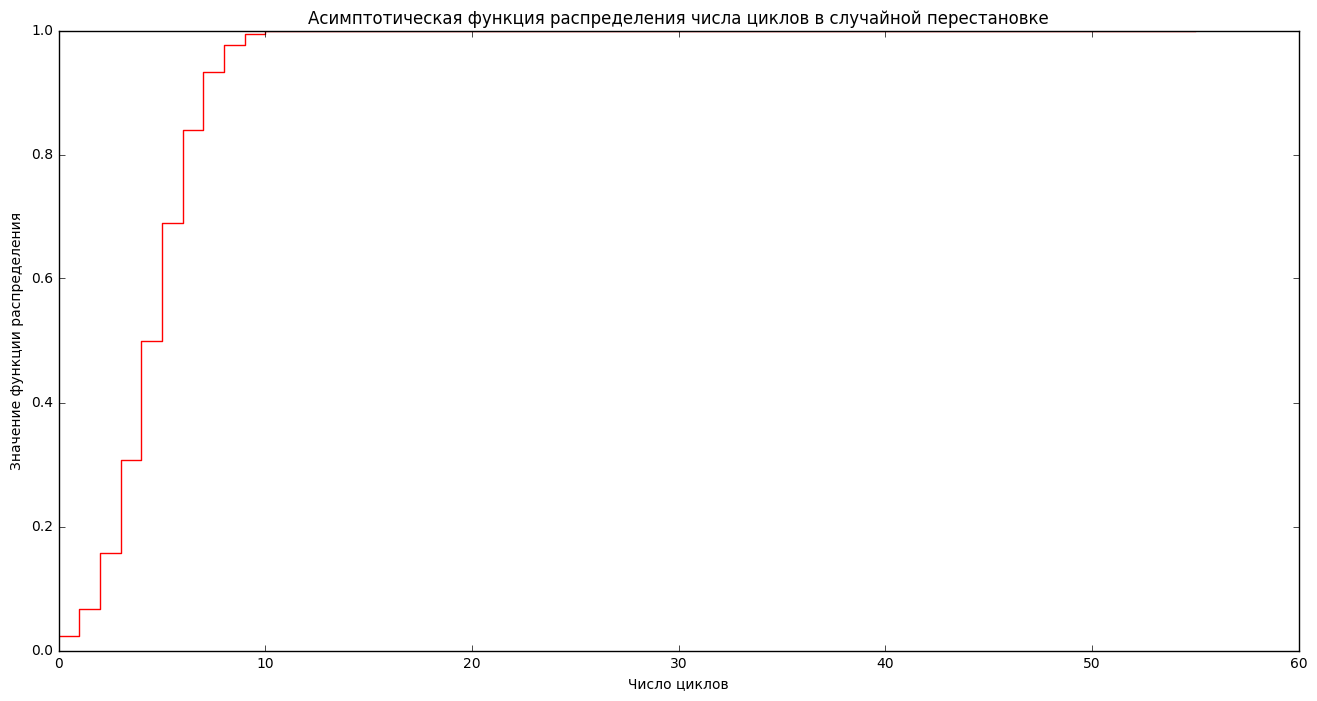

In [147]:
unnormalized_cycles_number = [0] + numbers_from_1_to_n
normalized_cycles_number = normalize_values(unnormalized_cycles_number, math.log(n), math.log(n))
norm_destribution_function = norm.cdf(normalized_cycles_number)  # Вычисление функции нормального распределения в данных точках.

x = unnormalized_cycles_number
y = norm_destribution_function

plt.figure(figsize=figure_size)
plt.title('Асимптотическая функция распределения числа циклов в случайной перестановке')
plt.xlabel('Число циклов')
plt.ylabel('Значение функции распределения')
plt.plot(x, y, 'r-', drawstyle='steps-post')

## Task 4

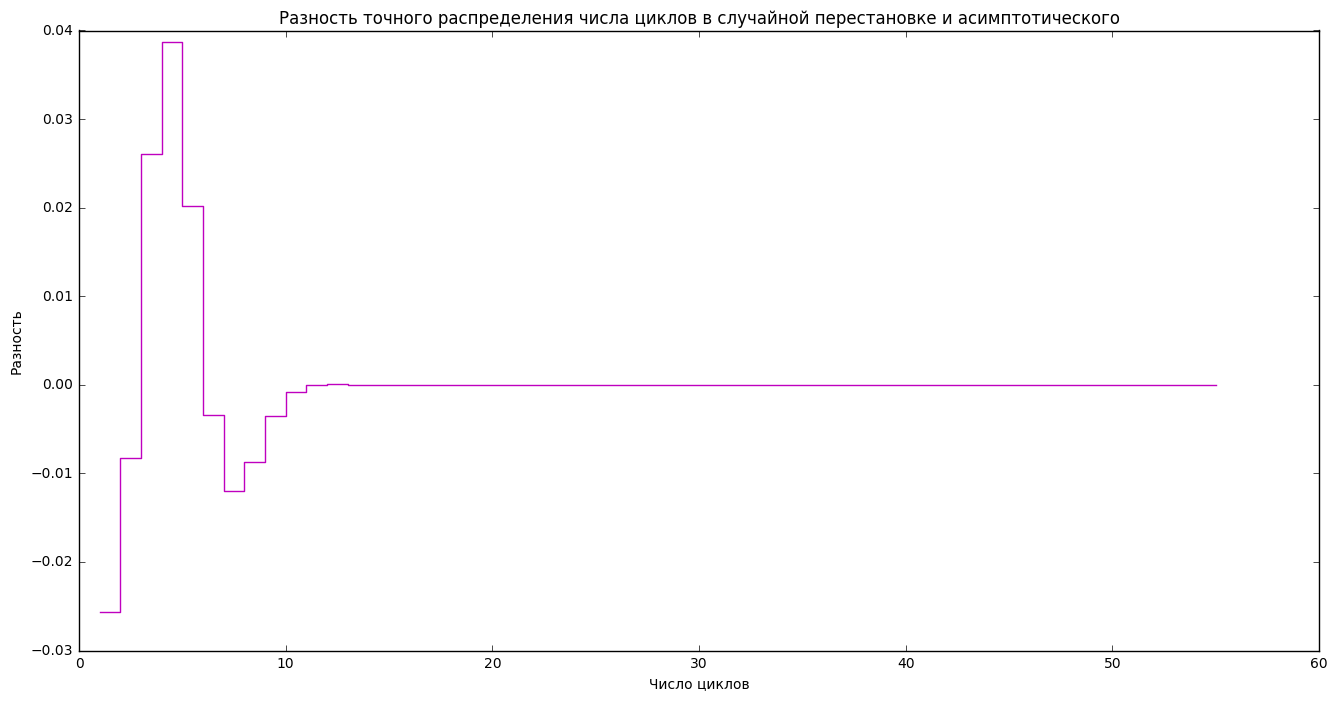

In [148]:
cycles_number_destribution  # Точное распределение.
norm_cycles_number_destribution = get_destribution(norm_destribution_function)  # Асимптотическое распределение.
cycles_number_difference = np.array(cycles_number_destribution) -\
                           np.array(norm_cycles_number_destribution)  # Их разность.

x = numbers_from_1_to_n
y = cycles_number_difference

plt.figure(figsize=figure_size)
plt.title('Разность точного распределения числа циклов в случайной перестановке и асимптотического')
plt.xlabel('Число циклов')
plt.ylabel('Разность')
plt.plot(x, y, 'm-', drawstyle='steps-post')